# Bibliotecas a utilizar

In [1]:
import sys
#!{sys.executable} -m pip install mlxtend
# https://dzone.com/articles/classification-from-scratch-svm-78

In [2]:
# Bibliotecas a utilizar 
import numpy                   as np      # Uso de álgebra lineal, funciones vectoriales
import pandas                  as pd      # Trabajar con DataFrames
import matplotlib.pyplot       as plt     # Para realizar gráficas
from sklearn.metrics           import accuracy_score        # Función para calcular la precisión de clasificación
from sklearn.metrics           import confusion_matrix      # Función para calcular una matriz de confusión
from sklearn                   import svm                   # Biblioteca con funciones de SVM
from sklearn.datasets          import make_blobs            # Función para generar puntos aleatorios
from mlxtend.plotting          import plot_decision_regions # Función para graficar los las regiones de decision

import warnings
warnings.filterwarnings('ignore')

## Ejemplo 1

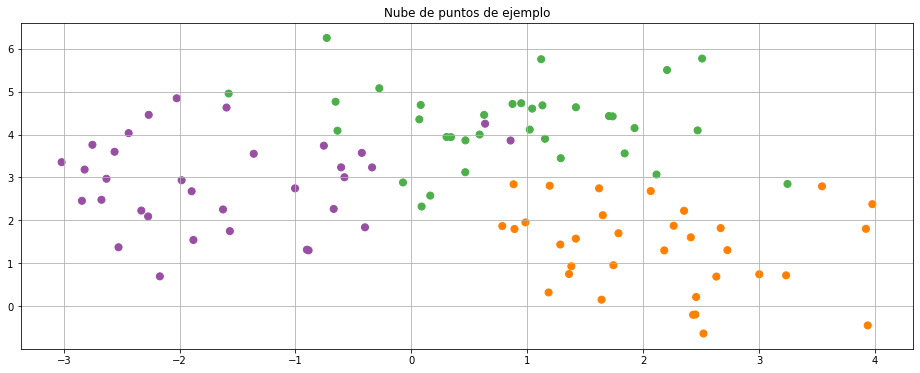

In [3]:
catalogo_colores = ["#4daf4a", "#ff8000", "#984ea3"]

# Creamos 40 puntos y los graficamos
X, y = make_blobs(n_samples=100, centers=3, random_state=0 ) # 0,1,2
y_colores = [ catalogo_colores[k] for k in y ]

plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Nube de puntos de ejemplo")
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap(name="Set1"), s=50)
plt.scatter(X[:, 0], X[:, 1], c=y_colores, s=50)
plt.grid()
plt.show()

# Para revisar todos los 'cmap' disponibles
#import matplotlib.cm
#print(matplotlib.cm.cmap_d.keys())
#https://matplotlib.org/gallery/color/colormap_reference.html

In [4]:
# Generamos nuestro clasificador
clasificador_svm = svm.SVC(kernel='linear').fit(X, y)
clasificador_svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Graficando de manera nativa

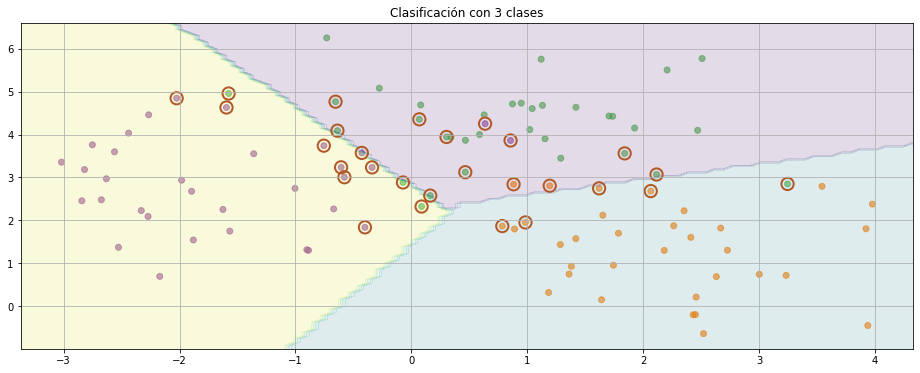

Precisión del modelo ::  92.0 %


In [5]:
# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Clasificación con 3 clases")
# Graficamos los puntos
plt.scatter( x=X[:,0], y=X[:,1], c=y_colores, label="Puntos", alpha = 0.6)

# Obtenemos los limites de la grafica actual para poder calcular Z
x_lim      = plt.gca().get_xlim()
y_lim      = plt.gca().get_ylim()
XX, YY     = np.meshgrid( np.linspace(x_lim[0], x_lim[1], 100  ), np.linspace(y_lim[0], y_lim[1], 100 ) )
XY         = np.vstack( [XX.ravel(), YY.ravel()] ).T
Z_fondo    = clasificador_svm.predict( XY ).reshape( XX.shape ) 
# Graficamos el fondo para identificar la clase
plt.contourf(XX, YY, Z_fondo , alpha=0.15)
# Graficamos los vectores de soporte
plt.scatter(clasificador_svm.support_vectors_[:, 0], clasificador_svm.support_vectors_[:, 1], s=150,
           linewidth=2, facecolors='none', edgecolors='#b15928')
plt.grid()
plt.show()
print("Precisión del modelo :: ", clasificador_svm.score( X, y )*100, "%" )

### Graficando con 'plot_decision_regions'

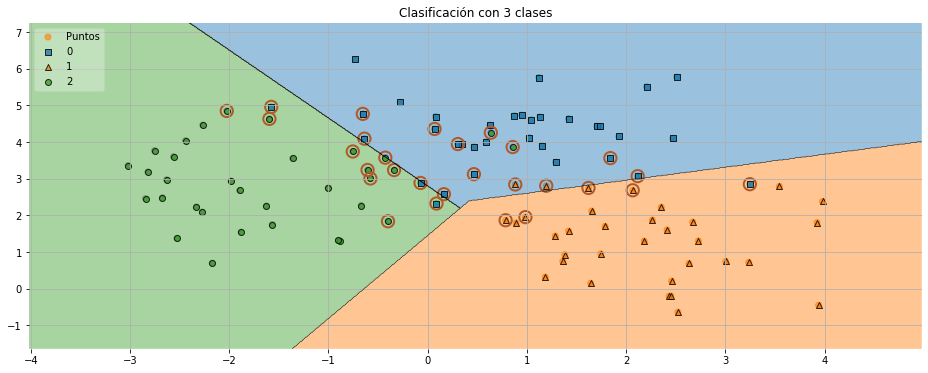

Precisión del modelo ::  92.0 %


In [6]:
# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Clasificación con 3 clases")
# Graficamos los puntos
plt.scatter( x=X[:,0], y=X[:,1], c=y_colores, label="Puntos", alpha = 0.6)
# Graficamos el fondo para identificar la clase
plot_decision_regions(X, y, clasificador_svm, legend=2)
# Graficamos los vectores de soporte
plt.scatter(clasificador_svm.support_vectors_[:, 0], clasificador_svm.support_vectors_[:, 1], s=150,
           linewidth=2, facecolors='none', edgecolors='#b15928')
plt.grid()
plt.show()
print("Precisión del modelo :: ", clasificador_svm.score( X, y )*100, "%" )